In [1]:
import os
import sys
import pandas as pd
from rdkit.Chem import PandasTools
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import os
import MDAnalysis as mda
from MDAnalysis import transformations
from MDAnalysis import analysis
from MDAnalysis.analysis import rdf

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir("/home/ess545/comp-lab-class-rev/Week12/")

In [3]:
# load in files
water_energy = np.loadtxt("Runs/Water/AIMD_Water_1ps-1.ener")
proton_energy = np.loadtxt("Runs/Proton/AIMD_proton_1ps-1.ener")

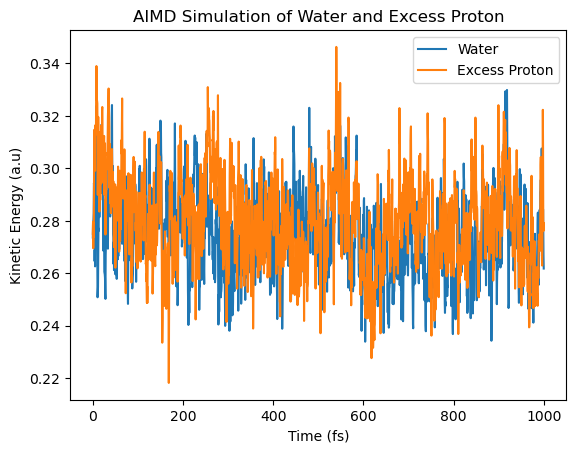

In [4]:
# plot energy
plt.plot(water_energy[:,1], water_energy[:,2], label='Water')
plt.plot(proton_energy[:,1], proton_energy[:,2], label = 'Excess Proton')
plt.xlabel("Time (fs)")
plt.ylabel("Kinetic Energy (a.u)")
plt.title("AIMD Simulation of Water and Excess Proton")
plt.legend()

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


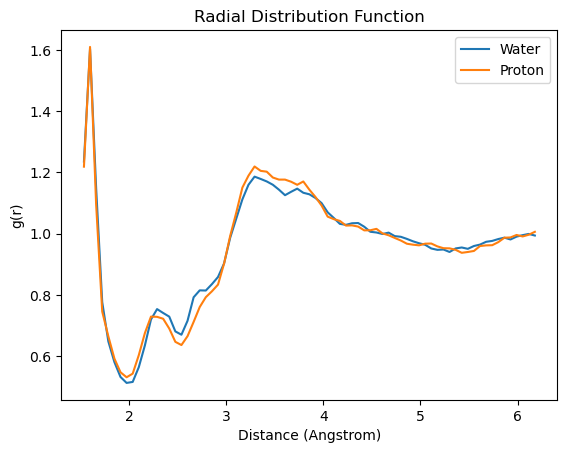

In [12]:
# set box dimensions
u_water = mda.Universe("Inputs/water.xyz", "Runs/Water/AIMD_Water_1ps-pos-1.xyz", topology_format = "XYZ")
u_proton = mda.Universe('Runs/Proton/proton.xyz', "Runs/Proton/AIMD_proton_1ps-pos-1.xyz", topology_format = "XYZ")
box_size = transformations.boxdimensions.set_dimensions([12.42, 12.42, 12.42, 90, 90, 90])
u_water.trajectory.add_transformations(box_size)
u_proton.trajectory.add_transformations(box_size)

# compute rdf
rdf_water = rdf.InterRDF(u_water.atoms, u_water.atoms, bins = 100, range=(1.5, 6.21))
rdf_proton = rdf.InterRDF(u_proton.atoms, u_proton.atoms, bins = 100, range=(1.5, 6.21))
rdf_water.run()
rdf_proton.run()
plt.plot(rdf_water.results.bins, rdf_water.results.rdf)
plt.plot(rdf_proton.results.bins, rdf_proton.results.rdf)
plt.xlabel('Distance (Angstrom)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function')
plt.legend(['Water', 'Proton'])
